In [1]:
import matplotlib.pyplot as plt
import numpy as np

def LUdecomp(a):
    n = len(a)
    for k in range(0,n-1):
        for i in range(k+1,n):
            if a[i,k] != 0.0:
                lam = a [i,k]/a[k,k]
                a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
                a[i,k] = lam
    return a

def LUsolve(a,b):
    n = len(a)
    for k in range(1,n):
        b[k] = b[k] - np.dot(a[k,0:k],b[0:k])
    b[n-1] = b[n-1]/a[n-1,n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
    
    return b

def LUdecomp3(c,d,e):
    n = len(d)
    for k in range(1,n):
        lam = c[k-1]/d[k-1]
        d[k] = d[k] - lam*e[k-1]
        c[k-1] = lam
    
    return c,d,e

def LUsolve3(c,d,e,b):
    n = len(d)
    for k in range(1,n):
        b[k] = b[k] - c[k-1]*b[k-1]
    
    b[n-1] = b[n-1]/d[n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - e[k]*b[k+1])/d[k]
    
    return b

![img](./p1.png)

In [2]:
import numpy as np

u = np.array([2,2,2,-2])
c = np.array([6,7,8,7,5])
d = np.array([-1,-2,3,3])
A = np.diag(u, k=1) + np.diag(c) + np.diag(d, k=-1)
b = np.eye(5)

U = LUdecomp(A)
x = LUsolve(U,b)
print('x ->\n', x)
print('\nnp.linalg.inv  ->\n',np.linalg.inv(A))
print('x_n은 A의 역함수이다.')

x ->
 [[ 0.16666667 -0.04761905  0.01190476 -0.00396825 -0.00132275]
 [ 0.          0.14285714 -0.03571429  0.01190476  0.00396825]
 [ 0.          0.          0.125      -0.04166667 -0.01388889]
 [ 0.          0.          0.          0.16666667  0.05555556]
 [ 0.          0.          0.          0.          0.16666667]]

np.linalg.inv  ->
 [[ 0.16666667 -0.04761905  0.01190476 -0.00396825 -0.00132275]
 [ 0.          0.14285714 -0.03571429  0.01190476  0.00396825]
 [ 0.          0.          0.125      -0.04166667 -0.01388889]
 [ 0.          0.          0.          0.16666667  0.05555556]
 [ 0.          0.          0.          0.          0.16666667]]
x_n은 A의 역함수이다.


![img](./p2.png)

In [3]:
import numpy as np
from time import time

def LU(n):
    u = -np.ones(n-1)
    c = 4*np.ones(n)
    d = -np.ones(n-1)

    A = np.diag(u,k=1) + np.diag(c) + np.diag(d,k=-1) 
    b = 5*np.ones(n)
    b[0] = 9
    t_i = time()
    U = LUdecomp(A)
    t_f = time()
    return LUsolve(U,b),t_f-t_i

def LU3(n):
    u = -np.ones(n-1)
    c = 4*np.ones(n)
    d = -np.ones(n-1)
    b = 5*np.ones(n)
    b[0] = 9
    t_i = time()
    uu, cc, dd = LUdecomp3(u,c,d)
    result = LUsolve3(uu,cc,dd,b)
    t_f = time()
    return result, t_f-t_i

ns = [8,10,12]
for n in ns:
    print('n = %i : \nx ->\n'%n,LU3(n)[0])
    print('LU  time :', LU(n)[1], '\nLU3 time :', LU3(n)[1])
    print('LU time / LU3 time :', LU(n)[1]/LU3(n)[1])

n = 8 : 
x ->
 [2.90186213 2.60744851 2.52793193 2.5042792  2.48918486 2.45246023
 2.32065606 1.83016402]
LU  time : 0.0001246929168701172 
LU3 time : 4.124641418457031e-05
LU time / LU3 time : 2.308080808080808
n = 10 : 
x ->
 [2.90191936 2.60767745 2.52879042 2.50748425 2.50114659 2.4971021
 2.48726181 2.45194513 2.3205187  1.83012968]
LU  time : 0.0001354217529296875 
LU3 time : 4.982948303222656e-05
LU time / LU3 time : 2.6280193236714977
n = 12 : 
x ->
 [2.90192347 2.60769388 2.52885206 2.50771437 2.5020054  2.50030723
 2.49922351 2.49658681 2.48712374 2.45190814 2.32050884 1.83012721]
LU  time : 0.0001652240753173828 
LU3 time : 5.9604644775390625e-05
LU time / LU3 time : 2.9004329004329006


![img](./p3.png)

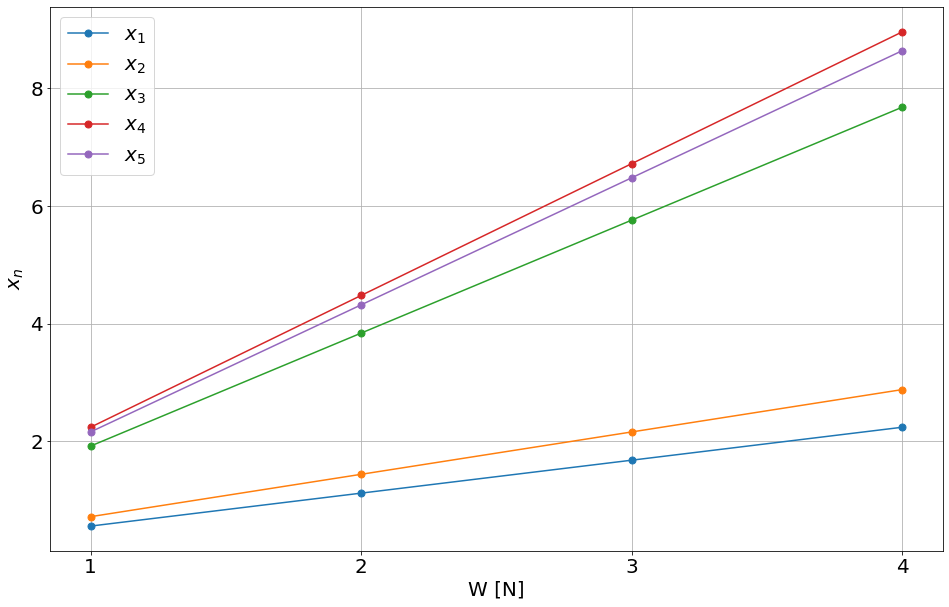

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ch2 import *
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (16,10)

def spring(W,K):
    uu = np.array([0,0,-2])
    u = -np.ones(4)
    c = np.array([2,4,4,2,3])

    A = np.diag(uu,k=2) + np.diag(u,k=1) + np.diag(c) + np.diag(u,k=-1) + np.diag(uu,k=-2)
    b = W/K*np.ones(5)
    U = LUdecomp(A)
    return LUsolve(U,b)

w = [1, 2, 3, 4]
xns = np.vstack([spring(1,2.5),spring(2,2.5),spring(3,2.5),spring(4,2.5)]).T

for i in range(0,5):
    plt.plot(w,xns[i],'.-',label='$x_{%i}$'%(i+1),markersize=14)
plt.legend()
plt.xlabel('W [N]')
plt.ylabel('$x_{n}$')
plt.xticks(w)
plt.grid()
plt.show()